# <u><font color=blue>GRIPAUGUST21<u></font>
    
####     Done by : Amala Johnson 
## DATA SCIENCE AND BUSINESS ANALYTICS

###   TASK-1 Prediction using Supervised ML


###   Introduction:
   Supervised learning, also known as supervised machine learning, is a subcategory of machine learning and artificial intelligence.The linear regression model is a classical Supervised learning Algorithm.The simple linear model is modelled when the model has only two variables one variable is continuous variable(depended variable),independent variable which can be continuous/categorical. It is a type of regressionanalysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. 
    The model is Y = β0 + β1X + ϵ.<br>
<b>Y</b> is the dependent or study variable(Score)<br><b>x</b> is the independent cariable(Study hours)<br><b>β0</b> is intercept<br><b>β1</b> is the slope of the line<br><b></b> ϵ is the error term Here, the model will be build training data and accuracy is measured using test data.
####  Objective:
i)To Predict the percentage of an student based on the number of study hours using supervisied learning
algorithm for simple linear regression. To check the accuracy measure of the model.
ii) To predict the score of a student if the study time is 9.25 hrs/ day    

In [2]:
##import pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset

data=pd.read_csv("Task")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Exploratory Data Analysis

In [4]:
# Dimension of dataset
data.shape

(25, 2)

<i>There are 25 rows and 2 columns for the dataset.</i>

In [6]:
# Descriptive summary of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<i>From the summary 50% of the data lies very close the mean value.</i>

In [6]:
# Checking the datatype and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<i>There is no missing values in the data. Hours is the float data type and the scores is the integer data type</i>

<function matplotlib.pyplot.show(close=None, block=None)>

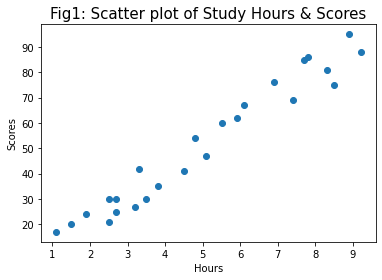

In [16]:
plt.scatter(data.Hours,data.Scores)##Scatterplot
plt.title("Fig1: Scatter plot of Study Hours & Scores",fontsize=15)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show

<i>From the scatterplot above, it is observed that there exist a linear relation between the study hours and
percentage of score.The Scatter plot shows that the data points are positively correlated that is if the study
hours increases percentage of score also increases. Hence, there is a positive linear relationship between
number of hours studied and the percentage of score.The correlation between two varaibles can be validated
using Heatmap between independent(Hours) and dependent variable(Scores)</i>


In [67]:
#To divide the data into inputs and outputs
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

<AxesSubplot:>

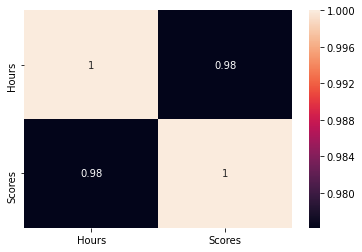

In [20]:
##Heatmap between independent(Hours) and dependent variable(Scores)
correlation=data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [21]:
data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [22]:
data.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


<i>From the correlation matrix, correlation coefficient is 0.98 which is close to 1 and it is positive.Thus it can be
concluded that there exist a strong positive correlation between the variables,study hours & percentage of
score. Thus as number of hours increase,the percentage also increases.</i>

[Text(0.5, 1.0, 'Fig2:Box plot for Number of study hours')]

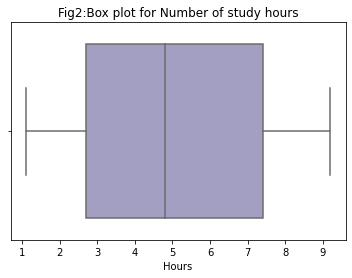

In [13]:
# Box plot for independent variable
#Box plot helps to indentify outliers,quartiles and skewness of the variable
box1=sns.boxplot("Hours",data=data,palette="Purples")
box1.set(title='Fig2:Box plot for Number of study hours')

<i>From the boxplot for number of study hours it can be infered that there is no outliers in study hours and the 50%
of the student study hours lies between the range of 2.7 to 7.4. The variable hours slightly skewed positively.</i>


Text(0.5, 1.0, 'Fig2: Boxplot of Scores')

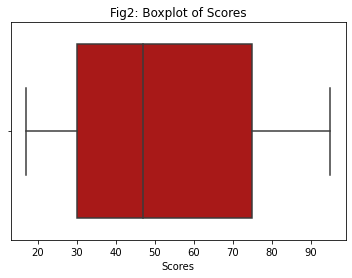

In [23]:
# Box plot for dependent variable

sns.boxplot(x="Scores",data=data,palette="gist_heat")##Boxplot
plt.title("Fig3: Boxplot of Scores")

<i>From the boxplot for Scores it can be infered that there is no outliers and the 50% of the student'scores lies
between the range of 30 to 75, maximum mark is approximately 95 and minimum mark is 15. The variable
scores skewed positively</i>

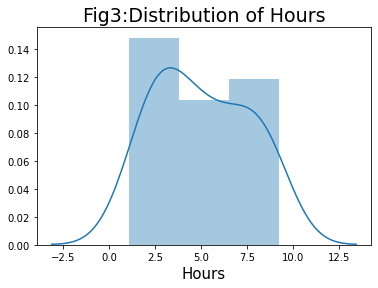

In [44]:
hour=data["Hours"]
scores=data["Scores"]

sns.distplot(hour)
plt.title('Fig3:Distribution of Hours', fontsize = 19)
plt.xlabel('Hours', fontsize = 15)
plt.show()

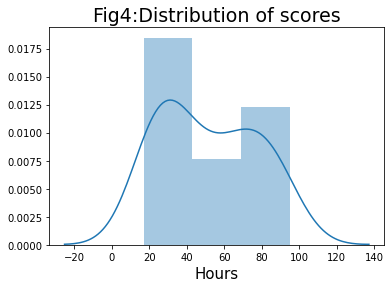

In [105]:
sns.distplot(scores)
plt.title('Fig4:Distribution of scores', fontsize = 19)
plt.xlabel('Hours', fontsize = 15)
plt.show()

### Linear Regression
Modelling : Linear regression
The linear regression model is a classical Supervised learning Algorithm.It is a basic and commonly used type
of predictive analysis.The simplest form of the regression equation with one dependent and one independent
variable is defined by the formula <br>y = c + b*x,<br> where y = estimated dependent variable score, c = constant, b =
regression coefficient, and x = score on the independent variable.


#### Creating Train and Test Data 

In [65]:
#To divide the data into inputs and outputs
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

In [66]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [68]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#### Train/Test data
We need to split the data into training and testing sets. Using the training set, we’ll build the model and perform
the model on the testing set. We’ll divide the training and testing sets into a 80% and 20% ratio, respectively.
We’ll split the data by importing train_test_split from the sklearn.model_selection library. train_test_split is a
function for splitting data arrays into two subsets: for training data and for testing data. With this function, you
don’t need to divide the dataset manually.
By default, Sklearn train_test_split will make random partitions for the two subsets. However, a random state for
the operation can also be specified. The following parameters (arguments) areincluded in the train_test_split
function.<br>
<b>x, y :</b>The first parameter is the dataset you’re selecting to use.<br>
<b>train_size :</b> This parameter sets the size of the training dataset. There are three options: None, which is the
default, Int, which requires the exact number of samples, and float, which ranges from 0.1 to 1.0.<br>
<b>test_size : </b>This parameter specifies the size of the testing dataset.<br>
<B>random_state:</b> This parameter sets the seed for random split and ensures same split is reproducible.

In [69]:
# Importing the package for splitting and the train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

<i>Splitted the data into training and testing sets of 80% and 20% ratio respectively using train_test_split function.</i>


#### Training the Algorithm


In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train) 
print("Training complete.")
print("Regressor Coefficient(β1): ",regressor.coef_)
print("Intercept (β0): ",regressor.intercept_)

Training complete.
Regressor Coefficient(β1):  [9.91065648]
Intercept (β0):  2.018160041434669


<b>Inference from the fitted model</b><br>
The fitted model is <br><b>Scores(Y)= 2.018160041434683 + 9.91065648*Hours.</b><br>
<i>The sign of a regression coefficient tells whether there exist a positive or negative correlation between the
independent variable the dependent variable. A positive coefficient indicates that as the value of the
independent variable increases, the mean of the dependent variable also tends to increase.
The equation shows that the coefficient of study hour is 9.91065648.The coefficient indicates that for every
additional hour of study time we can expect the score of the student increase by an average of approximately
10 marks(9.91065648). That is, From the data given,we estimate that the score of the student is increased
about 10 marks approximately(9.91065648) for a increased unit of study hour.</i>


#### Fitted line of Train Data

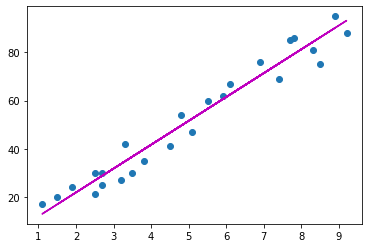

In [71]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,'m');
plt.show()


<i>From the graph it can be observed that some of the points are above the line and some are below it but lies
very close to the fitted line.</i>

<b>Making Prediction</b>

In [84]:
#making prediction
y_pred = regressor.predict(X_test)

In [85]:
# Comparing Actual and Predicted values
df= pd.DataFrame({'Actual': Y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [98]:
##2.Predicting the score of the student if the study hour is 9.25 hours/day
hours=9.25

In [101]:
own_pred = regressor.predict([hours])
print("No of Hours={}".format([hours]))
print("Predicted Score={}".format(own_pred[0]))

No of Hours=[[9.25]]
Predicted Score=93.69173248737538


<b>Accuracy of the Model</b><br>

In [103]:
from sklearn.metrics import r2_score
r=r2_score(Y_test,y_pred)
print("The r2 score of the model is",r)

The r2 score of the model is 0.9454906892105355




<i>The R2 value is 0.94549. An R-squared result of 70 to 100 indicates that the model explains the ouput
well.Here,That is 94.5% of the total variation of scores(dependent variabel) explained by the study hours
(independent Variable). The value of R square is closer to one. The model predicting the score with 94.5%
accuracy. Therefore, the model is a good fit.<br></i>

   
 <b>Evaluating the Model</b><br>
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how
well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean absolute
error. There are many such metrics.



In [104]:
from sklearn import metrics
print('Mean Absolute Error:',
 metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 4.18385989900298


<i>MAE is the mean of the absolute errors. The absolute error is the absolute value of the difference between the
predicted value and the actual value. Mean Absolute Error measures accuracy for continuous variables.</i>


### THANK YOU!!!